##  Statistical model:

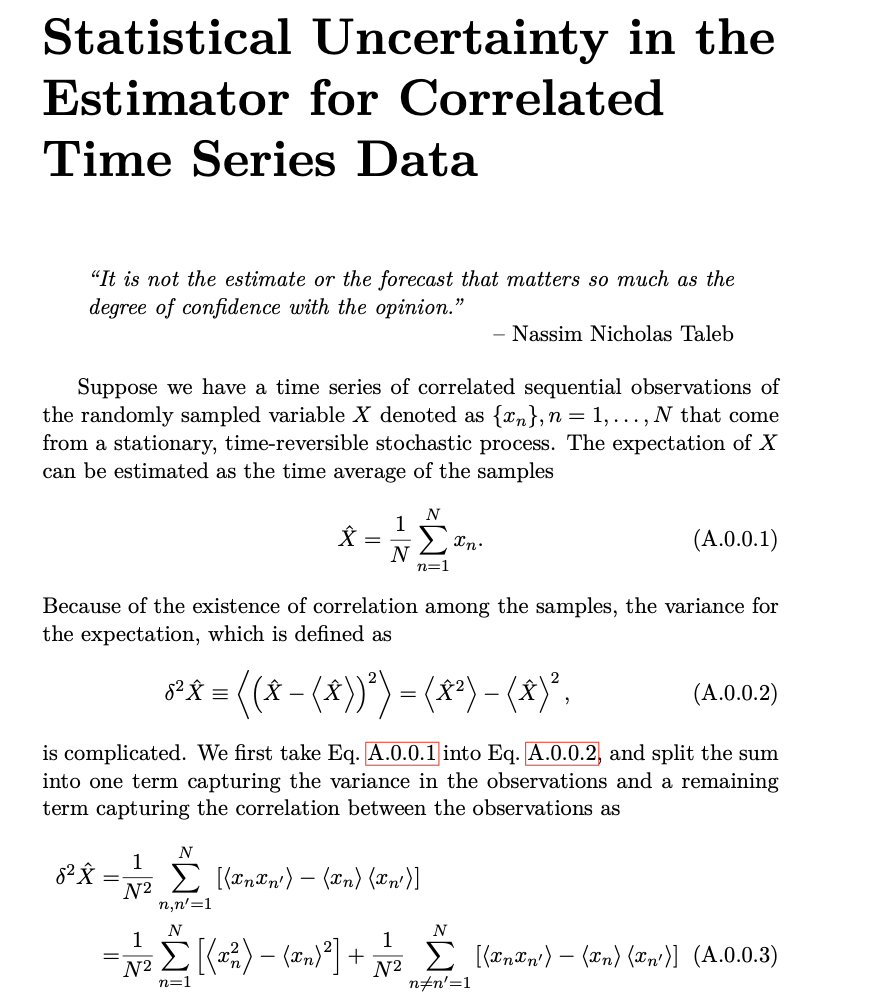

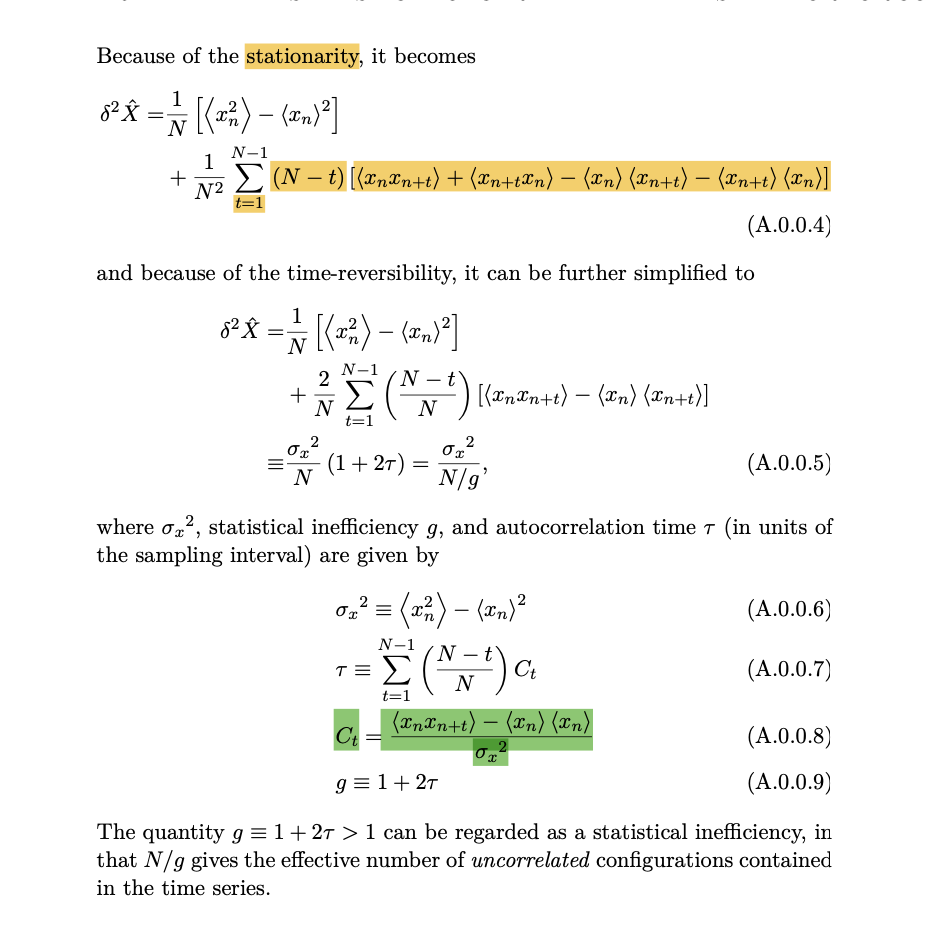

## Implementation

reference to the :[1] Shirts MR and Chodera JD. Statistically optimal analysis of samples from multiple equilibrium states.
J. Chem. Phys. 129:124105, 2008
http://dx.doi.org/10.1063/1.2978177

[2] J. D. Chodera, W. C. Swope, J. W. Pitera, C. Seok, and K. A. Dill. Use of the weighted
histogram analysis method for the analysis of simulated and parallel tempering simulations.
JCTC 3(1):26-41, 2007.

A module for extracting uncorrelated samples from correlated timeseries data.

This module provides various tools that allow one to examine the correlation functions and
integrated autocorrelation times in correlated timeseries data, compute statistical inefficiencies,
and automatically extract uncorrelated samples for data analysis.


In [5]:
import math
import warnings
import numpy as np
import numpy.linalg

In [6]:
#function to compute the expectation and variance
def expectation_variance(Sample):
    s=0         #for E[X]
    s2=0        #for E[X^2]
    for i in Sample:
        s+=i
        s2+=i*i
    mean=s/len(Sample)            #<X>
    mean_x2=s2/len(Sample)        #<X^2> 
    var=mean_x2-mean*mean
    return mean,var

In [53]:
##########autocorrelation version is just one condition of crosscorrelation statistical inefficiency
## when A is the same as B series 
##Be sure that A and B must have same dimensions

def corr_time(A_n,B_n=None,mintime=3):

    N=A_n.size

    #initiate g
    g=1.0
    if B_n is None:
         B_n=np.array(A_n)

    mu_A=A_n.mean()
    mu_B=B_n.mean()

    # Make temporary copies of fluctuation from mean.
    dA_n = A_n.astype(np.float64) - mu_A
    dB_n= B_n.astype(np.float64) - mu_B
    ##denominator of Ct
    
    sigma2_AB=(dA_n*dB_n).mean()
   
    ######key part
    t=1
    while (t<N-1):
        C=np.sum(dA_n[0:(N-t)]*dB_n[t:N] + dB_n[0:(N - t)] * dA_n[t:N])/(2*float(N-t)*sigma2_AB)
        
        ## terminates if the correlatoin function goes negative
        
        if (C <= 0.0) and (t > mintime):
            break
                  
        g += 2.0 * C * (1.0 - float(t) / float(N))
      
        t += 1        
    
     #g must be at least unity
    if (g < 1.0):
        g = 1.0
    
    return g

In [58]:
def integratedAutocorrelationTime(A_n, B_n=None, fast=False, mintime=3):
    """Estimate the integrated autocorrelation time."""
    g = corr_time(A_n, B_n, fast, mintime)
    tau = (g - 1.0) / 2.0
    return tau


In [72]:
from pymbar.testsystems import correlated_timeseries_example
A_n = correlated_timeseries_example(N=1000, tau=5.0)

g=corr_time(A_n)
auto_correlated_time=integratedAutocorrelationTime(A_n)
print("statistical Inefficiency is {}".format(g))
print("autocorrelated time is {}".format(auto_correlated_time))


statistical Inefficiency is 9.175906765039457
autocorrelated time is 4.0879533825197285


refer: https://github.com/freeenergylab/pymbar-3.0.1.beta0/blob/master/pymbar/timeseries.py